#  1. Introducción teórica

## 1.1 Distancias

Sean P y Q dos objetos o puntos. Una función real que asigna un valor real a cada par de objetos d(P,Q), es una **distancia** si verifica:

- Es una función simétrica: d(P, Q) = d(Q, P)
- Es una función no negativa: d(P, Q)  > 0
- Identificación del objeto: d(P, P) = 0

Decimos que, además, d es una **distancia métrica** si verifica que :

- Es definida positiva: d(P, Q) = 0 si y sólo si P = Q
- Cumple la desigualdad triangular: d(P, Q) <= d(P, R) + d(R,Q)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

https://ichi.pro/es/9-medidas-de-distancia-en-ciencia-de-datos-159983401462266

In [1]:
from sklearn.neighbors import DistanceMetric

In [2]:
dist_euclidean = DistanceMetric.get_metric('euclidean')
data_dist = [[1,2,3], [4,5,6]]
dist_euclidean.pairwise(data_dist)

array([[0.        , 5.19615242],
       [5.19615242, 0.        ]])

In [3]:
dist_manhattan = DistanceMetric.get_metric('manhattan')
data_dist = [[1,2,3], [4,5,6]]
dist_manhattan.pairwise(data_dist)

array([[0., 9.],
       [9., 0.]])

In [ ]:
dist_chebyshev = DistanceMetric.get_metric('chebyshev')
data_dist = [[1,2,3], [4,5,6]]
dist_chebyshev.pairwise(data_dist)

In [ ]:
dist_minkowski = DistanceMetric.get_metric('minkowski')
data_dist = [[1,2,3], [4,5,6]]
dist_minkowski.pairwise(data_dist)

## 1.2 Algoritmo KNN (K Nearest Neighbours)

**KNN** es un algoritmo de clasificación supervisado que basado en criterios de vecindad, es decir, clasificará cada observación basándose en la mayoría de los datos que le rodean. 

**No genera un modelo**, si no que memoriza las muestras de entrenamiento para luego hacer predicciones basadas en como se parecen las nuevas observaciones a la antiguas

Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer.

Características:

- Sensible a K y la distancia
- Fácil de implementar. No es necesario construir el modelo
- Se puede usar para clasificación, regresión y búsqueda
- Lento: usa todo el dataset para entrenar cada nuevo punto
- Es no paramétrico (no necesita conocer la distribución de los datos)
- Aprendizaje basado en instancias: no aprende un modelo, sino que “memoriza” los datos de entrenamiento

Algoritmo:

- Calcular la distancia entre el dato a clasificar y el resto de datos del dataset de training.
- Seleccionar los “k” elementos más cercanos (menor distancia)  dependerá del dipo de distancia
- Realizar una “votación de mayoría” entre los k puntos: los de una clase/etiqueta que dominen decidirán su clasificación final.

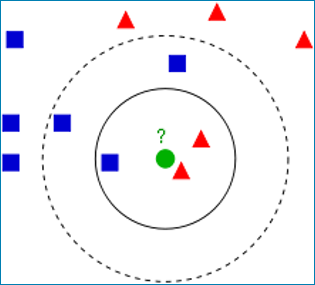

# 2. KNN 

## 2.1 Implementación manual del algoritmo

In [ ]:
dataset = {
    'k':[[1,2],[1.5,2.7],[2,3],[2.5,2.4],[3,2]],
    'r':[[6,6.4],[6.5,6],[7,6.5],[8,6]]
}
new_point = [7,5]

In [ ]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100)

In [ ]:
# predict valor a clasificar

# k = número de vecinos que van a decidir
# k debería ser mayor que el conjunto de los datos, si no, no podrá escoger "k" vecinos.


def k_nearest_neighbors(data, predict, k = 3,):
    
    distances = []
    for element in data:
        for variable in data[element]:

            
            # distancia euclídea con numpy (para calcular la norma de un vector)
            d = np.linalg.norm(np.array(variable) - np.array(predict))
            distances.append([d, element])
  
    print(distances)
    
    # Se ordena por distancia y nos quedamos solo con los k primeros elementos (vecinos)
    # Nos hemos quedado con los k más cercanos. Ahora habría que analizar la clase a la que pertenecen
    votes = [i[1] for i in sorted(distances)[:k]]#sorted ordena por la primera columna
  
    print(votes)
    
    # Ya nos hemos quedado con los k ptos más cercanos, ahora habría que ver cuál es el frupo mayoritario para
    # clasificar en dicho grupo
    vote_result = Counter(votes).most_common(1)

    print(vote_result)
    
    
    return vote_result[0][0]#[('r',2), ('k', 1)]

In [ ]:
new_point = [7,5]
result = k_nearest_neighbors(dataset, [new_point])
result

In [ ]:
new_point = [3.5,2]
result = k_nearest_neighbors(dataset, [new_point])
result

## 2.2 Regresión KNN

In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
#from evaluacion_funciones import * # pip install graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression

In [5]:
dataset = datasets.load_boston()
X = dataset.data
y = dataset.target
print(np.shape(X))
dataset.keys()

(506, 13)


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2': metrics.r2_score}

In [ ]:
# Partición de datos

X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print('Tamaño train: ', np.shape(X_training), np.shape(y_training))
print('Tamaño test: ', np.shape(X_testing), np.shape(y_testing))


In [ ]:
# Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
stdr_trained = standardizer.fit(X_training)
X_stdr = stdr_trained.transform(X_training)

In [ ]:
# Algoritmo KNN
k = 10
reg = KNeighborsRegressor(n_neighbors = k, weights='distance', metric='euclidean')

In [ ]:
def evaluacion(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = funcion(y_true, y_pred)
    return res

def grafica_real_vs_pred(y_true, y_pred, metricas, algoritmo):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Real Value')
    ax.set_ylabel('Prediction')
    plt.title("%s\nMAE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
              (algoritmo,metricas['MAE'],metricas['RMSE'],metricas['MAPE'],metricas['R2']))
    plt.show()

In [ ]:
# Validación cruzada interna
y_pred = cross_val_predict(reg, X_stdr, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42))

# Extraer error de cada Fold
cross_val_results = cross_val_score(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=10, shuffle=True, random_state=42), scoring='neg_mean_absolute_error')
print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))

# Visualización de resultados
results = evaluacion(y_training, y_pred, metricas)
grafica_real_vs_pred(y_training, y_pred, results, "KNN"+str(k))

In [ ]:
# Entrenamiento del modelo final

model = reg.fit(X_stdr, y_training)

In [ ]:
# Estandarización de las característiacs de test (con el mismo modelo usado para train)
X_test_stdr = stdr_trained.transform(X_testing)

In [ ]:
# Pred conjunto de test
y_pred_test = model.predict(X_test_stdr)

In [ ]:
# Evaluación del modelo conjunto de test
results = evaluacion(y_testing, y_pred_test, metricas)
print(results)